In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import pickle
import random
random.seed(42)
np.random.seed(42)

In [3]:
with open("../scripts/dpo_rl_model/dataset.pickle", "rb") as file:
#with open("../ressources/dpo_rl_model_25-01-13_20x200/dataset.pickle", "rb") as file:
    original_df = pickle.load(file)

In [4]:
original_df

,llmin,configuration,parameters,argos,type,scores_bt1,scores_bt2,llmout_A,llmout_B,scores_A,scores_B,dataset_position
0,The environment features a circle composed of ...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Connection,-2.314546,-2.256674,--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,0.999133,0.999841,0
1,The rectangular area has dimensions 4.49 m x 7...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Distribution,-8.005522,-7.675262,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,0.831786,0.839091,0
2,"With a radius of 3.54 meters, the circular are...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Distribution,-9.813072,-14.9114,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,0.791804,0.679031,0
3,"In this setting, a circular arena with a radiu...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Connection,-14.23914,-29.07616,--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,0.853302,0.671855,0
4,The environment is constructed as a rectangula...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Distribution,-19.07254,-19.36208,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 -...,0.586989,0.580584,0
...,...,...,...,...,...,...,...,...,...,...,...,...
435,The environment is a rectangular area with len...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Aggregation,0.275,0.325,--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,0.311321,0.367924,1
436,"In this setting, a rectangle is formed with di...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Aggregation,0.6,0.183333,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,0.679245,0.207547,1
437,"The rectangular space is 3.72 m long, 1.29 m w...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Foraging,0.2,0.0,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,0.006410,0.000000,1
438,"The rectangular space is 6.13 m long, 3.41 m w...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",Connection,-29.35282,-9.459336,--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,0.611392,0.895033,1


In [5]:
df = original_df

In [6]:
df['average_score'] = (df['scores_bt1'] + df['scores_bt2']) / 2

# Step 2: Group by 'type' and 'dataset_position' and calculate the mean of the average scores
result = df.groupby(['dataset_position','type',])['average_score'].mean().reset_index()

# Display the result
print(result)

   dataset_position          type average_score
0                 0   Aggregation      0.241829
1                 0    Connection    -15.474116
2                 0  Distribution    -11.232749
3                 0      Foraging      1.138462
4                 1   Aggregation      0.211245
5                 1    Connection    -16.228383
6                 1  Distribution    -11.207383
7                 1      Foraging      1.780702


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

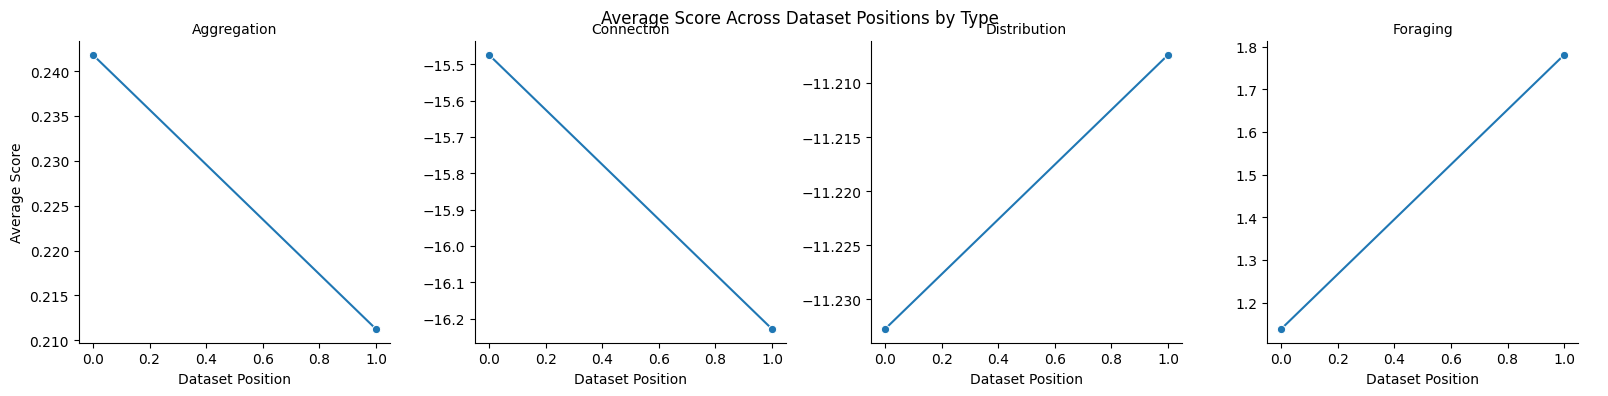

In [8]:
# Step 3: Create a FacetGrid using seaborn
g = sns.FacetGrid(result, col='type', col_wrap=4, height=4, sharey=False)
g.map(sns.lineplot, 'dataset_position', 'average_score', marker='o')

# Step 4: Add titles and labels
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Dataset Position", "Average Score")
g.add_legend()

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Average Score Across Dataset Positions by Type')
plt.show()

/home/jj/miniforge3/envs/automode_llm/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/jj/miniforge3/envs/automode_llm/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/jj/miniforge3/envs/automode_llm/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/jj/miniforge3/envs/automode_llm/lib/python3.10/site-packages/seabor

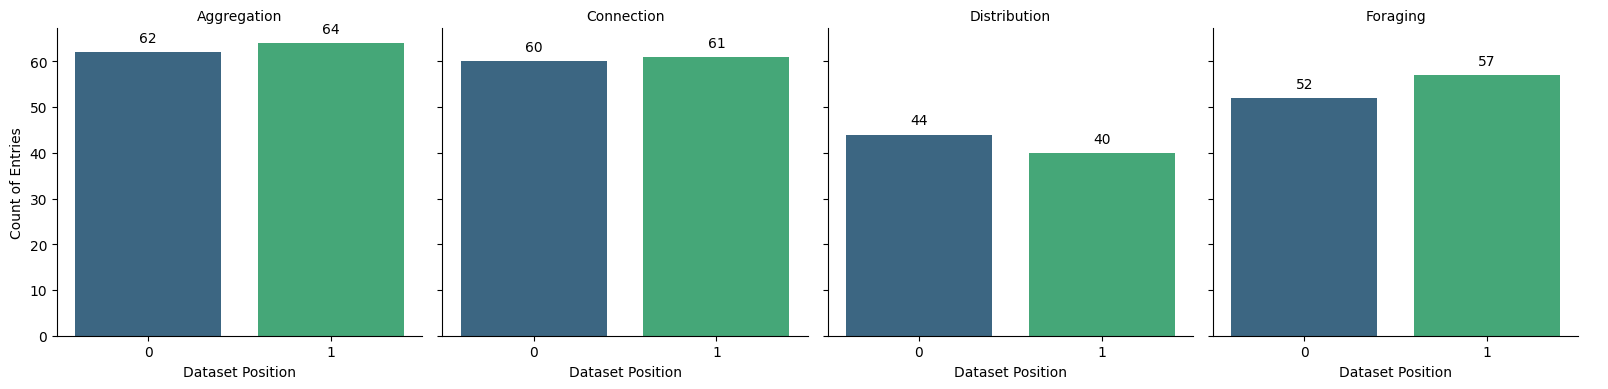

In [9]:
# Count non-null entries for each combination of type and dataset_position
length_counts = df.groupby(['type', 'dataset_position'])['average_score'].count().reset_index()
length_counts.columns = ['type', 'dataset_position', 'length']
g = sns.FacetGrid(length_counts, col='type', col_wrap=4, height=4)
bar_plot = g.map_dataframe(sns.barplot, x='dataset_position', y='length', palette='viridis')

# Annotate bars with the actual numbers
for ax in bar_plot.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', 
                    fontsize=10, color='black', 
                    xytext=(0, 5),  # 5 points vertical offset
                    textcoords='offset points')

g.set_axis_labels("Dataset Position", "Count of Entries")
g.set_titles(col_template="{col_name}")
g.add_legend()
plt.show()


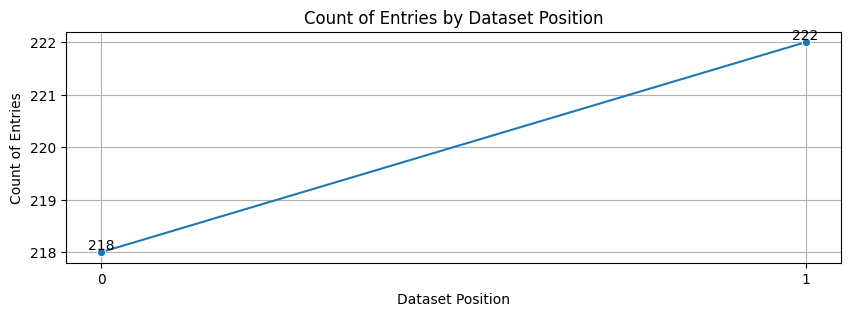

In [10]:
length_counts = df.groupby('dataset_position')['average_score'].count().reset_index()
length_counts.columns = ['dataset_position', 'length']
plt.figure(figsize=(10, 3))
line_plot = sns.lineplot(data=length_counts, x='dataset_position', y='length', marker='o')

# Annotate points with the actual numbers
for index, row in length_counts.iterrows():
    line_plot.text(row['dataset_position'], row['length'], 
                   f'{row["length"]}', 
                   color='black', 
                   ha='center', 
                   va='bottom')

plt.title('Count of Entries by Dataset Position')
plt.xlabel('Dataset Position')
plt.ylabel('Count of Entries')
plt.xticks(length_counts['dataset_position'])  # Ensure all dataset positions are shown
plt.grid()
plt.show()
